In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# NOW LETS IMPORT A CSV FILE

In [86]:
#LOADING THE DATA FROM CSV TO PANDAS DATA FRAME
calories=pd.read_csv("C:\\Users\\DELL\\Desktop\\Project2\\calories.csv")

In [87]:
#now we will checck the preview of the data which we importe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [88]:
#lets load the second csv file
exercise_data=pd.read_csv("C:\\Users\DELL\\Desktop\\Project2\\exercise.csv")
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


# COMBINING TWO DATAFRAMES

In [89]:
calories_data=pd.concat([exercise_data,calories['Calories']],axis=1)
#axis=1 refers to columns it means we want to join two data frames column wise
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [90]:
#lets check more about this data 

calories_data.shape
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [91]:
#no nan entries so we dont have to drop na any rows also the data looks clean
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [92]:
#checking for missing values in the combined data set
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [93]:
#no null values 
#overall we can say our data is properly cleaned now we can proceed towards visualisation


# DATA VISUALISATION

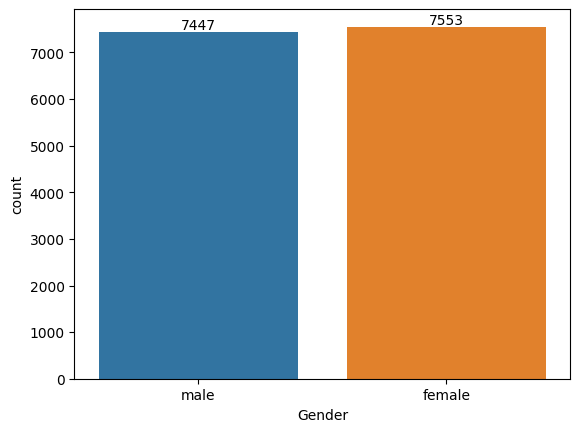

In [94]:
#NOW WE WAMNT COUNT OF MALES AND FEMALES IN THE GIVEN DATA SET SO WE WIL DO IT USING COUNT PLOT IN SEA BORN LIBRARY
ax=sns.countplot(x='Gender',data=calories_data)
for bar in ax.containers:
    ax.bar_label(bar)


In [95]:
#so we can observe that we have alomst equal no of females and males in our data set that is our data set is uniform

C:\Users\DELL\AppData\Local\Temp\ipykernel_10084\2335532531.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

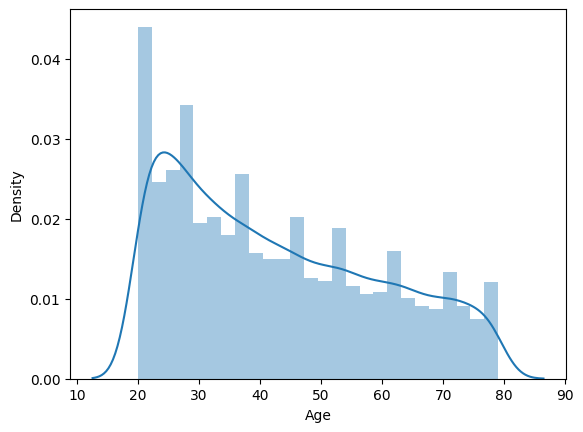

In [96]:
#finding the distribution of age 
#we cant be using count plot for the same because we will have a lot of bars to consider 
#the better way is to use distribution plot for the same
sns.distplot(calories_data['Age'])

In [97]:
#implies more people from the age group 20-30 and we have lesser people from higher age group and from the age group lesser than 20

C:\Users\DELL\AppData\Local\Temp\ipykernel_10084\2430521470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

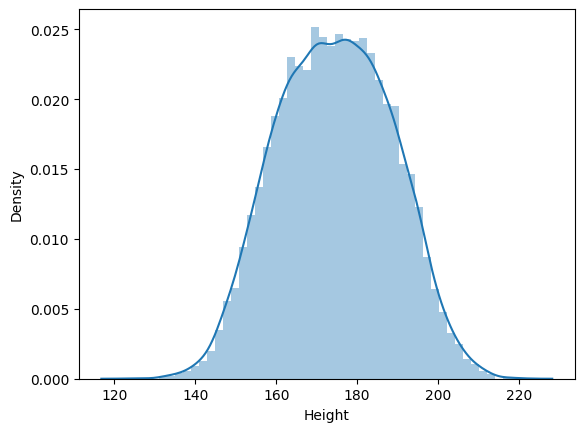

In [98]:
sns.distplot(calories_data['Height'])

In [99]:
#we can see that most of the people are in between 160-180

C:\Users\DELL\AppData\Local\Temp\ipykernel_10084\1539919118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

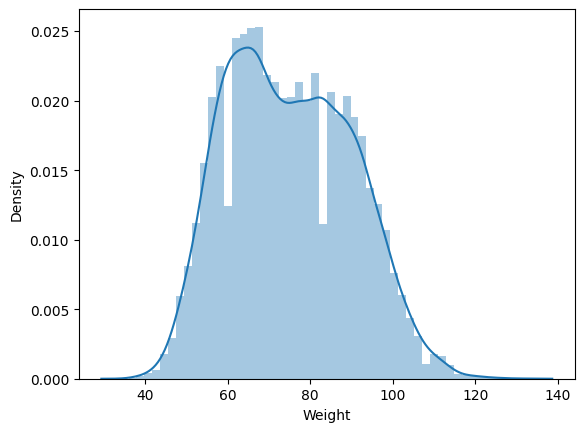

In [100]:
sns.distplot(calories_data['Weight'])

In [101]:
#we can see that we have a good number of people between 60-70kgs of weight

In [102]:
# before we proceed we got to note that we have 'Gender column in our data set , the whole data set is numerical exceot this column
# now our machine learning model can only process numerical data ,it cant process string data so we need to delete that colulmn from our data set
#also we have equal number of males and females in our data set so it wont matter much
#OR WE CAN REPLACE MALE AND FEMALE WITH NUMERICAL DATA 
#MALE=0
#FEMALE=1

# CONVERTING THE STRING DATA TO NUMERICAL DATA

In [103]:
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [104]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [105]:
#we can observe that now the gender column is also numerical in nature

# NOW WE WILL SEPERATE THE DEPENDENT AND INDEPENDENT COLUMNS

In [106]:
# INDEPENDENT COLUMNS ARE CALLED FEATURES AND DEPENDENT COLUMNS ARE CALLED TARGETS 

In [107]:
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)

In [108]:
Y=calories_data['Calories']

In [109]:
X.head()


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [110]:
Y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [111]:
#we can see now we have seperated the dependent and indepedent columns and we cqan see it getting towards multiple linear regression

# SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA

In [112]:
#  X_trian,Y_train,X_test,Y_test
#X_train ,Y_train represents the training data which will be used to train our ML algo  
#X_test,Y_test will be test data
#no we wil slip our data into train data and test data

In [113]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
#test data =0.2 means that 20 percent of the data will be used as testing data whereas remaining 80 percent of the data will be used as the trianing data
#random_state=2 implies that data will be splitted into a unique way

In [114]:
print(X.shape,X_train.shape,X_test.shape)
#so we cans see the 20 -80 split 
#the shape has no parenthesis because it is a kind of tuple

(15000, 7) (12000, 7) (3000, 7)


In [115]:
#loading the model
model=LinearRegression()

# LINEAR REGRESSION MODEL

In [116]:
#training the model with x_train
model.fit(X_train,Y_train) #fit function is used to train the model and we have entered the trsaining data into it

LinearRegression()

# EVALUATION OF MODEL ON THE BASIS OF TEST DATA

In [117]:
#NOW WE WILL ENTER X TEST DATA AND OUR MODEL WILL PREDICT Y FOR THE TEST DATA AND WE WILL CHECK THE ACCURACY BY COMPARINF THE OUTPUT WITH Y_TEST
test_data_prediction=model.predict(X_test)
print(test_data_prediction)

[137.49241057 182.18166512  50.15864741 ... 157.56637167  16.54924422
 100.21047087]


In [118]:
#now we have the predicted data with the help of our model

# DIFFERENCE BETWEEN PREDICTED Y AND ACTUAL Y TEST DATA
# MEAN ABSOLUTE ERROR


In [119]:

mae=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [120]:
print("THE MEAN ABSOLUTE ERROR VALUE IS:",mae)

THE MEAN ABSOLUTE ERROR VALUE IS: 8.385188053147184


# R2 value

In [121]:
r2=metrics.r2_score(Y_test,test_data_prediction)
print(r2)

0.9668790377181355
